## Deploying Prediction Model to REST API w. FLASK
- **API**: application programming interface; set of rules that define how applications/devices communicate btwn each other
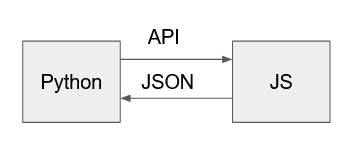

- **REST API**: api that conforms to design principles of the *REST* (Representational State Transfer); supports high-performing and reliable communication; scalable; also referred to *RESTful APIs*
    - use this way for security issue (directly getting data straight from DB -> front end would expose how the data is stored/gotten/organized
    - the code is adaptable for different scenarios/platforms (desktop -> mobile) -> the front-end desktop and mobile can use the same API to get the same information; can collaborate btwn different devs. w/o exposing the structure and info of the DB (the devs would make updates to the API itself rather than the back-end code that communicates w/ the DB)
    - *modularity*: can change language used to fetch DB information w/o changing the API method to communicate w/ the front-end; can make back-end updates w/o affecting how the information is conveyed to the user/front-end
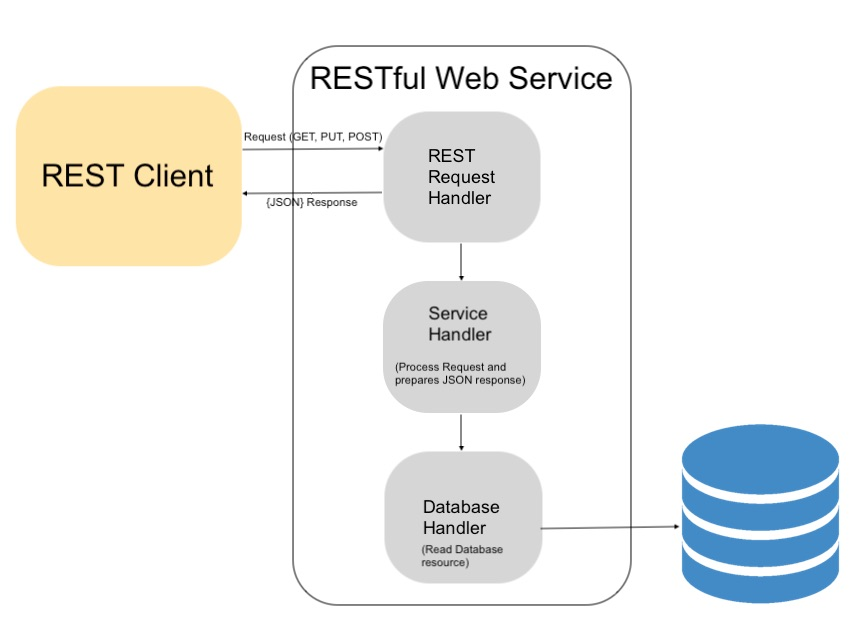

**Getting information from database to the user on the front-end**
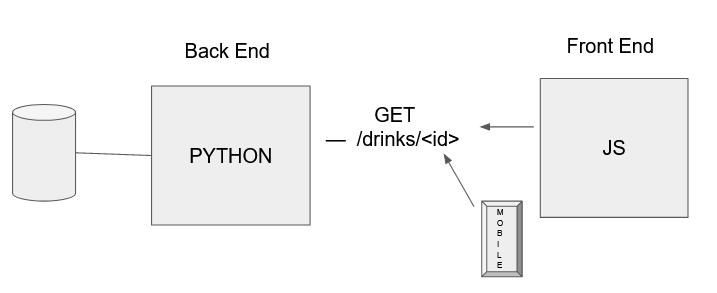

### Requesting Methods
- *GET*: retrieve data
- *POST*: write new data
- *DELETE*: delete data
- *PUT*: write; update old data

### Flask (Web Framework)
- *Flask*: micro web framework written in Python; defines template for API communication to get information

#### Step 1. Build The Prediction Model
- we will build model to deploy to the API

In [3]:
# Load The Dataset
# Link: https://www.kaggle.com/madhansing/bank-loan2
import pandas as pd
import numpy as np
df = pd.read_csv('madfhantr.csv')
df.dropna(inplace=True)
df = df.drop(['Loan_ID'], axis = 1)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome'], axis = 1)

df['Gender'].replace(['Male', 'Female'],[1, 0], inplace = True)

df['Married'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Dependents'].replace(['3+'],[3], inplace = True)

df['Self_Employed'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Education'].replace(['Graduate', 'Not Graduate'],[1, 0], inplace = True)

df['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[2, 1, 0], inplace = True)

df['Loan_Status'].replace(['Y', 'N'],[1, 0], inplace = True)

x = df.drop(['Loan_Status'], axis = 1)
y = df.loc[:, 'Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify = y)

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)  
clf.fit(oversampled_x,oversampled_y)

# save prediction model to Pickle
import pickle
pickle.dump(clf, open("model.pkl", "wb")) 

#### Step 2. Save the Model to Pickle

In [9]:
import pickle
CLF_model = pickle.load(open('model.pkl', "rb"))
result = CLF_model.predict([[1, 1, 1, 1, 0, 362, 360, 0, 1, 7200]])
print(result)
# clf is the name of the model. model.pkl is new file

[0]


C:\Users\mcken\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
# look at probability of the model - test the prediction model to verify the outcome
probability = CLF_model.predict_proba([[1, 1, 1, 1, 0, 362, 360, 0, 1, 7200]])
print(probability)

[[0.97520661 0.02479339]]


C:\Users\mcken\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Step 3. Create the API (Created in VS Code) and Display it in a Front-End
- allow the user to input numbers to make a prediction -> the API will return the prediction and display it in the homepage
- save the pickle file in the workspace where you created the API -> import by searching for "model3.pkl

**The Saved Model from Above**
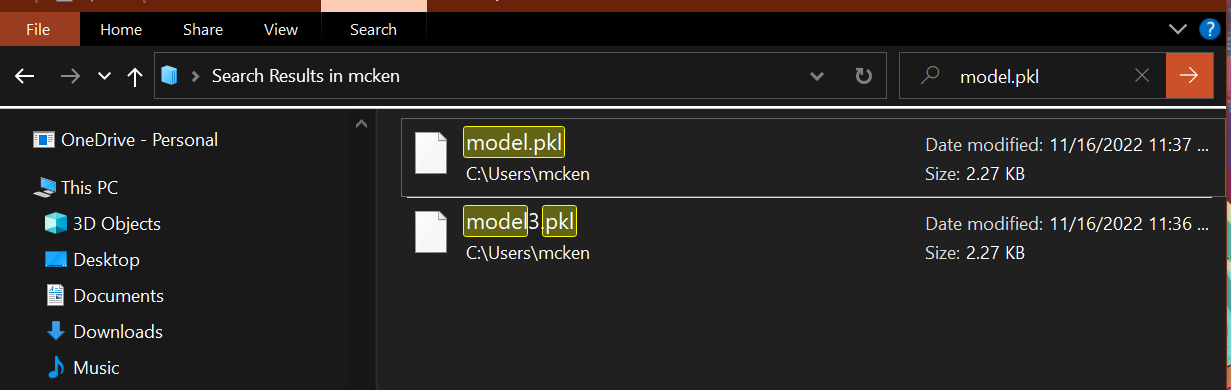

**Create Project in Folder**
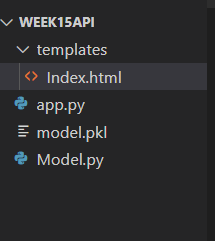

**Index.html**
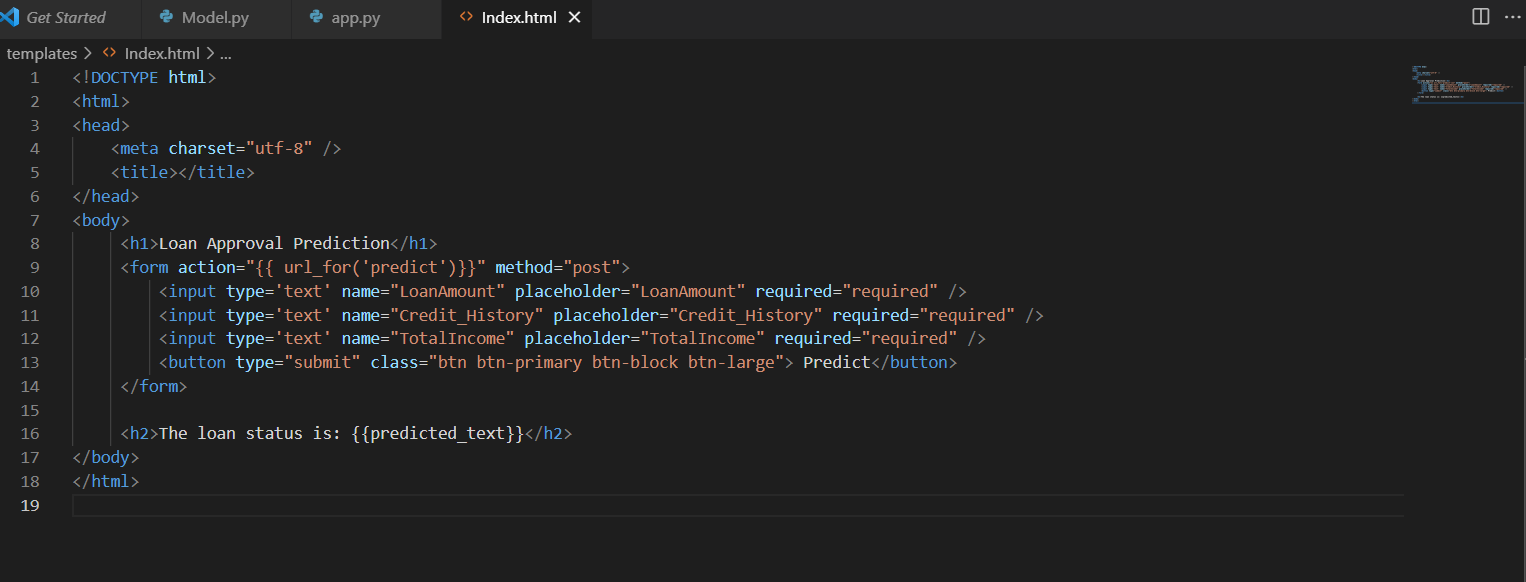

**app.py**
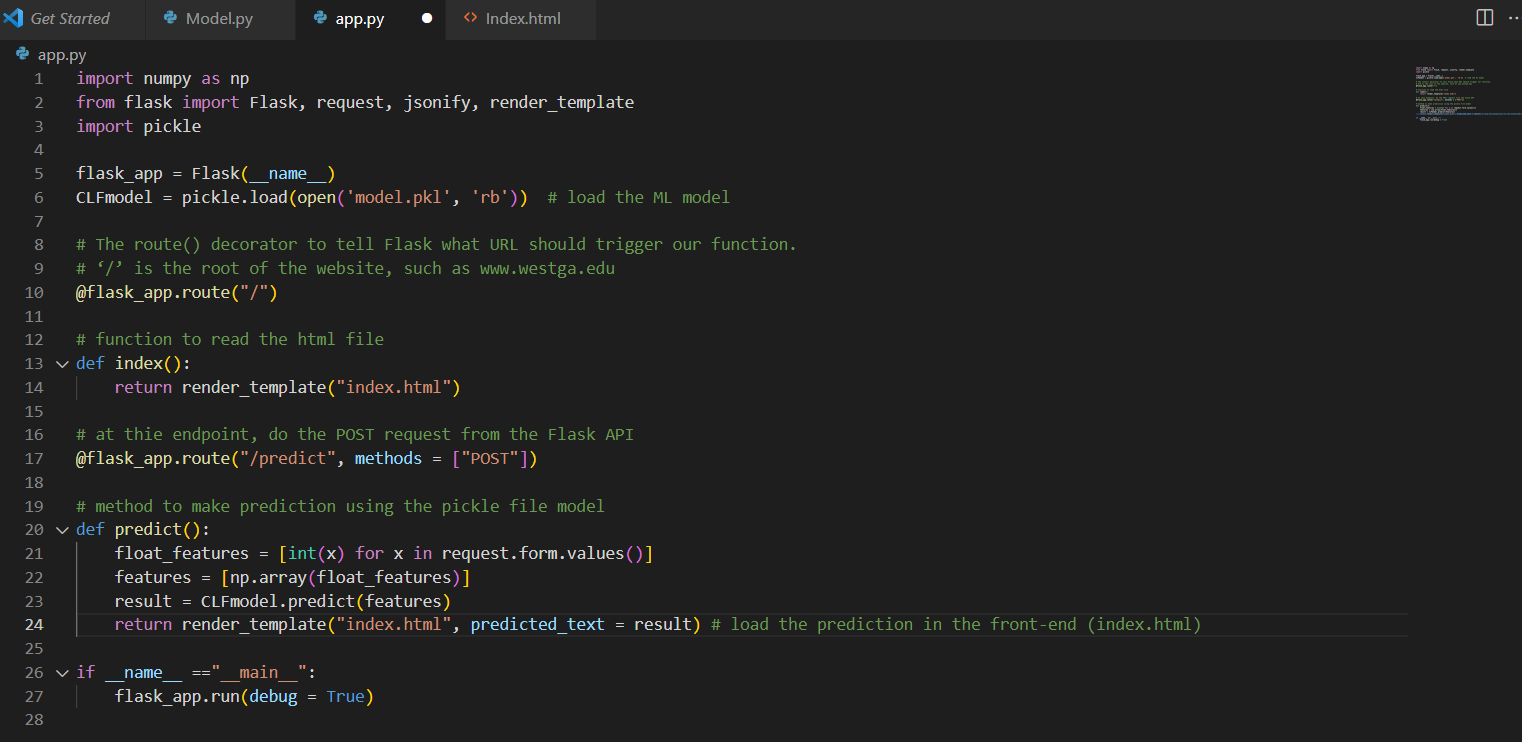

*model.py is currently empty*

### Test the API
1. Open w/ Live Server in VS Code
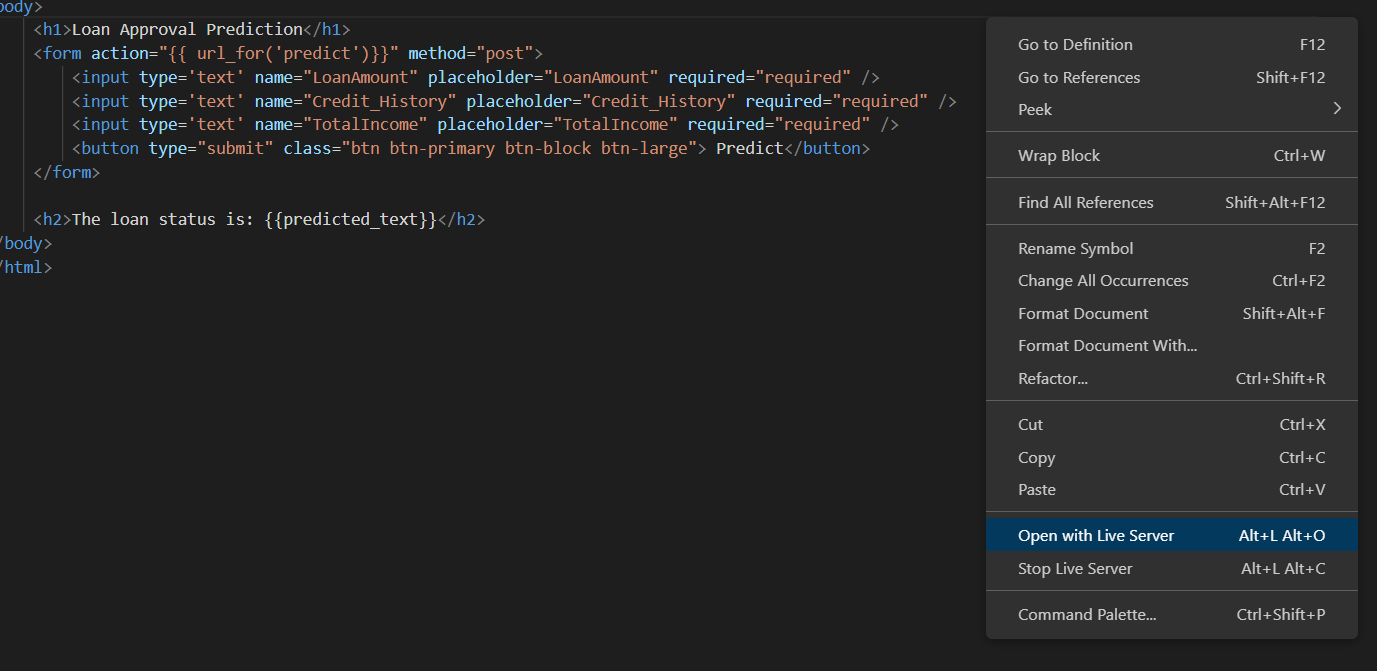

2. Page renders on local host w/ port at the endpoint
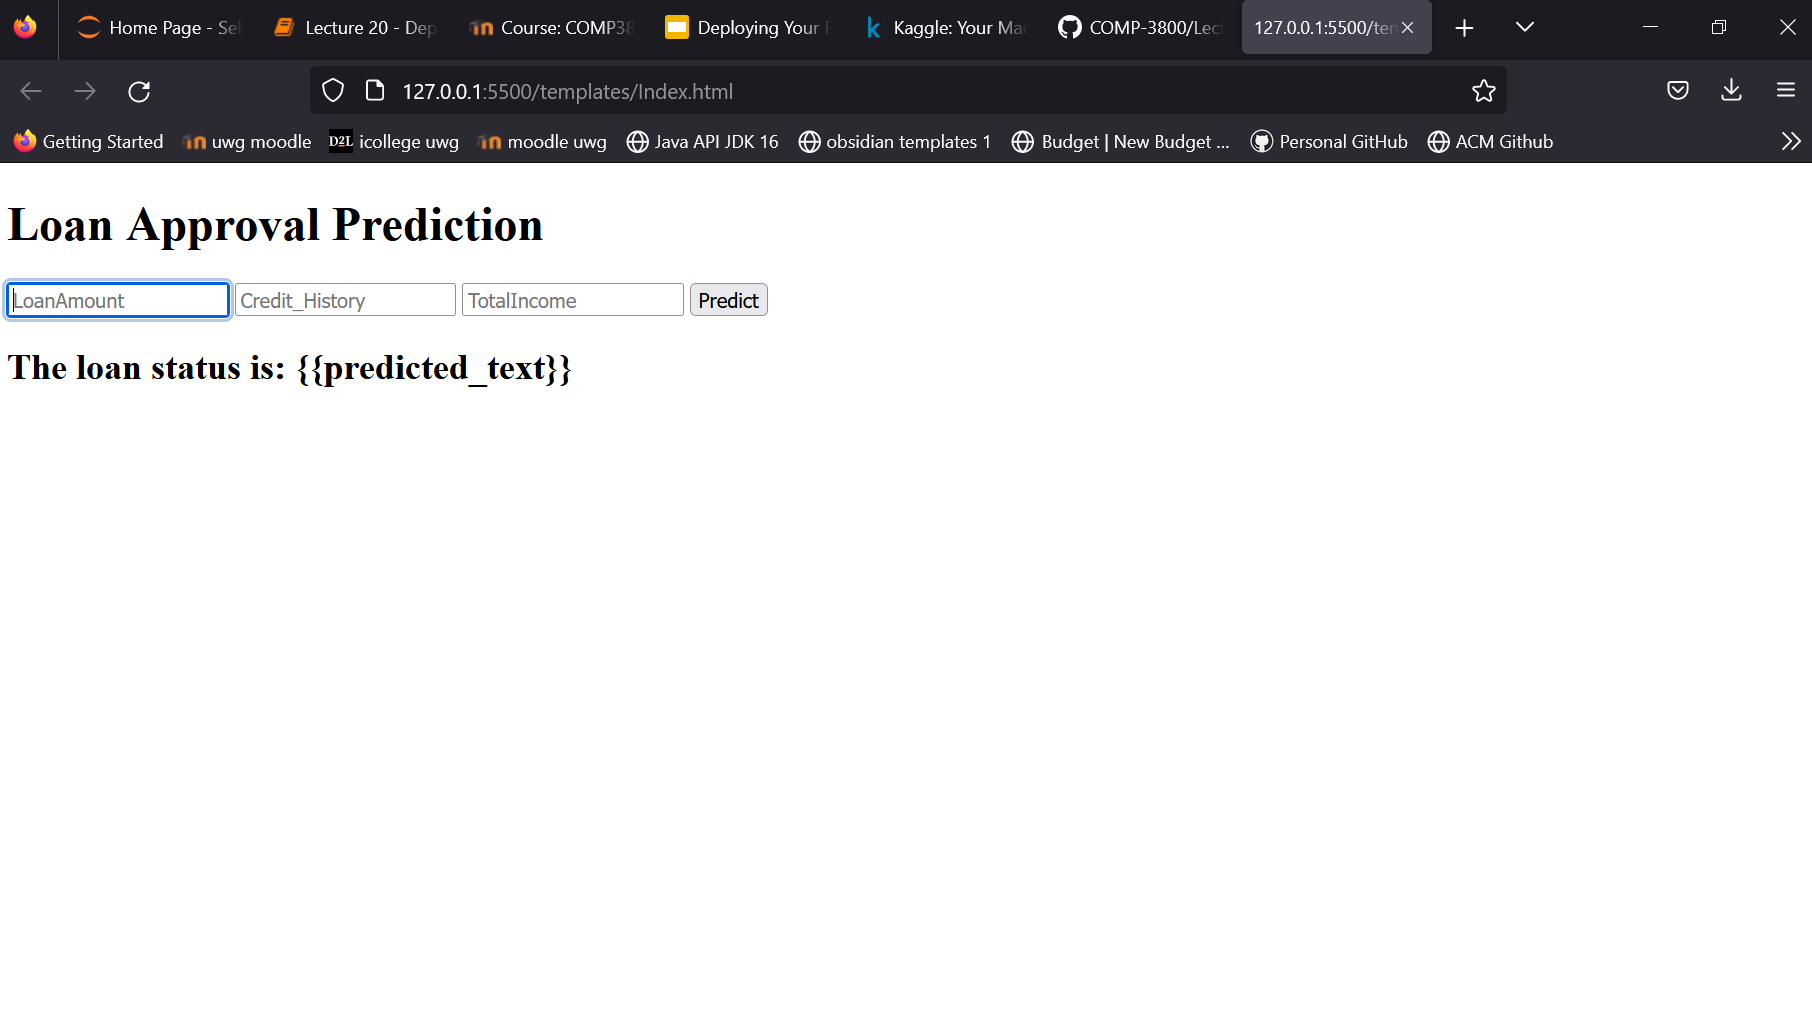

**MAKE SURE NUM OF COLS FROM MODEL AND INPUT IN FORM IS SAME AMT**

### Using Normalized Data to Build Model
- save scaler to pickle object
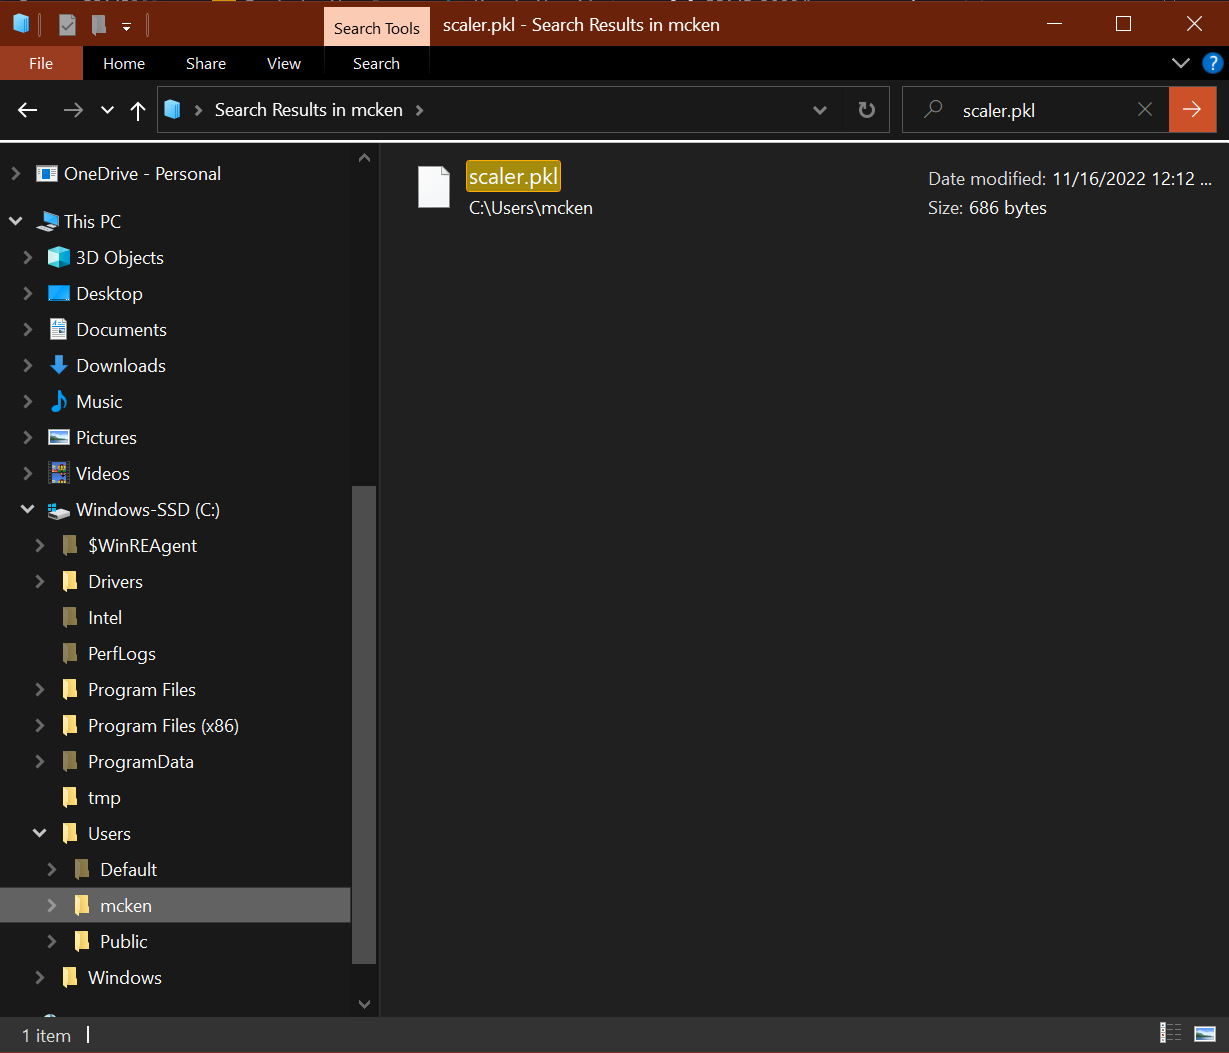

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

# load the data
iris = datasets.load_iris()
np_data = iris['data']
np_target = iris['target']

# Combine data and target into a DataFrame
np_d = np.concatenate((np_data, np_target.reshape(-1,1)), axis = 1)
df=pd.DataFrame(data= np_d, columns= iris['feature_names'] + ['target'])
x = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df.loc[:, 'target']

# normalizing features
x_final = df.loc[:, ['sepal width (cm)', 'petal length (cm)']]

# import libraries
from sklearn.preprocessing import MinMaxScaler

# normalize
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final) 

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  
classifier.fit(x_scaled, y) 

# Save your scaler to a pickle object:
from pickle import dump
dump(nor_x, open('scaler.pkl', 'wb'))

# Load it and apply it to the inputs
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

### The Model has Dummy Vars

####  1. Read the features.

In [ ]:
float_features = [int(x) for x in request.form.values()]

#### 2. Save the features to vars

In [ ]:
feature1 = float_features [1]
feature2 = float_features [2]......

#### 3. Change the multi-value feature to dummy vars

In [ ]:
if feature2 == 1:
    feature2_1 = 1
if feature2 == 2:
          feature2_2 = 1

#### 4. Use the new features for the prediction

In [ ]:
[np.array(feature1,feature2_1, feature2_2,  feature2_3, feature3….,)]]